In [43]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[161,
 201,
 202,
 205,
 171,
 179,
 163,
 11,
 180,
 184,
 15,
 164,
 214,
 165,
 196,
 190,
 189,
 20]

In [6]:
nutrient = 'iron'
vehicles = ['wheat flour','maize flour']
effective_fractions = [0, 
                       0, 
                       0.1666666667, 
                       0.9166666667]

In [7]:
baseline_coverage, counterfactual_coverage = get_baseline_and_counterfactual_coverage(coverage_data_dir,
                                             location_ids,
                                             nutrient,
                                             vehicles,
                                             years,
                                             coverage_levels)
counterfactual_coverage.head()

Excluded [11]/iron/wheat flour due to impossible logical values
Excluded [205]/iron/maize flour due to impossible logical values


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,vehicle,year
0,0.2,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
1,0.5,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
2,0.8,0.000311,0.002541,0.025241,0.004743,0.004695,0.007025,0.020704,0.024473,0.009634,...,0.002537,0.000939,0.021634,0.008003,0.004971,0.012208,0.007011,15,wheat flour,2021
3,0.2,0.003948,0.008454,0.033482,0.011371,0.011312,0.014089,0.028796,0.032691,0.017030,...,0.008448,0.005726,0.029760,0.015208,0.011653,0.019839,0.014073,15,wheat flour,2025
4,0.5,0.009403,0.017322,0.045842,0.021314,0.021238,0.024686,0.040934,0.045018,0.028126,...,0.017313,0.012907,0.041949,0.026014,0.021675,0.031286,0.024667,15,wheat flour,2025


# HEMOGLOBIN

In [8]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [9]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
201,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
202,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
205,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
171,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [17]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage.set_index(['location_id','vehicle','year']), 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage.set_index(['location_id','vehicle','year','coverage_level']), 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

NOTE: not currently applying time lag effect.
NOTE: not currently applying time lag effect.


draw_0  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2021 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.079037   
                                                 0.5             0.197591   
                                                 0.8             0.316146   

                                                                   draw_1  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2021 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.079103   
                                                 0.5             0.197758   
                                                 0.8             0.316412   

                                                                  draw_10  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2021 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.079052   
                                                 0.5             0.197630   
                                                 0.8             0.316209   

                                                                 draw_100  \
location_id sex_id age_group_id vehicle     year coverage_level             
15          1      2            wheat flour 2021 0.2             0.000000   
                                                 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.000000   
                                                 0.5             0.000000   
...                                                                   ...   
214         2      5            wheat flour 2021 0.5             0.000000   
                                                 0.8             0.000000   
                                            2025 0.2             0.079041   
                                                 0.5             0.197603   
                                                 0.8             0.316164   

                                                           

In [32]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)

mean_hgb = mean_hgb.reset_index()
mean_hgb = (mean_hgb
            .loc[mean_hgb.year_id.isin([2025, np.nan])]
            .set_index([c for c in mean_hgb.columns if 'draw' not in c]))

# note, expect to see missing results for locations excluded due to illogical values

mean_hgb.to_csv('anemia_files_u5/mean_hgb.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:119: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        162.537335   
                               3            NaN     baseline        128.108577   
                               4            NaN     baseline        116.694047   
                               5            NaN     baseline        124.209700   
                        2      2            NaN     baseline        162.373339   
...                                                                        ...   
214         wheat flour 2      4            2025.0  0.5              97.180567   
                                                    0.8              97.302869   
                               5            2025.0  0.2             100.567419   
                                                    0.5             101.240080   
                                                    0.8             101.912741   

                                                                        draw_1  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        161.366817   
                               3            NaN     baseline        132.713336   
                               4            NaN     baseline        118.048532   
                               5            NaN     baseline        118.689308   
                        2      2            NaN     baseline        167.888409   
...                                                                        ...   
214         wheat flour 2      4            2025.0  0.5              97.070107   
                                                    0.8              97.118929   
                               5            2025.0  0.2             102.018317   
                                                    0.5             102.286838   
                                                    0.8             102.555359   

                                                                       draw_10  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        175.149845   
                               3            NaN     baseline        135.965175   
                               4            NaN     baseline        108.423498   
                               5            NaN     baseline        124.179081   
                        2      2            NaN     baseline        161.528363   
...                                                                        ...   
214         wheat flour 2      4            2025.0  0.5              99.324877   
                                                    0.8              99.368229   
                               5            2025.0  0.2              98.664735   
                                                    0.5              98.903170   
                                                    0.8              99.141605   

                                                                      draw_100  \
location_id vehicle     sex_id age_group_id year_id coverage_level               
11          wheat flour 1      2            NaN     baseline        165.142201   
                               3            NaN     baseline        124.548957   
                               4            NaN     baseline        113.084533   
                               5            NaN     baseline        121.421113   
                        2      2            NaN     baseline        171.131066   
...                                                                        ...   
214         wheat flour 2      4            2025.0  0.5              98.270320   
                                                    0.8              98.305515   
                               5            2025.0 

In [19]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
(hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index()).to_csv('anemia_files_u5/sd_hgb.csv')

In [ ]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

In [33]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_u5/anemia_prev.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw','vehicle']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','vehicle','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year   draw     vehicle     coverage_level             
11          2            1      2021.0 draw_0   wheat flour NaN                  NaN   
                                NaN    draw_691 NaN         NaN                  NaN   
                                       draw_692 NaN         NaN                  NaN   
                                       draw_693 NaN         NaN                  NaN   
                                       draw_694 NaN         NaN                  NaN   
...                                                                              ...   
214         5            2      2025.0 draw_998 wheat flour 0.8             0.000846   
                                       draw_999 maize flour NaN                  NaN   
                                                wheat flour 0.2             0.000223   
                                                            0.5             0.000610   
                                                            0.8             0.001059   

                                                                            moderate  \
location_id age_group_id sex_id year   draw     vehicle     coverage_level             
11          2            1      2021.0 draw_0   wheat flour NaN                  NaN   
                                NaN    draw_691 NaN         NaN                  NaN   
                                       draw_692 NaN         NaN                  NaN   
                                       draw_693 NaN         NaN                  NaN   
                                       draw_694 NaN         NaN                  NaN   
...                                                                              ...   
214         5            2      2025.0 draw_998 wheat flour 0.8             0.016418   
                                       draw_999 maize flour NaN                  NaN   
                                                wheat flour 0.2             0.003524   
                                                            0.5             0.008794   
                                                            0.8             0.014044   

                                                                              severe  \
location_id age_group_id sex_id year   draw     vehicle     coverage_level             
11          2            1      2021.0 draw_0   wheat flour NaN                  NaN   
                                NaN    draw_691 NaN         NaN                  NaN   
                                       draw_692 NaN         NaN                  NaN   
                                       draw_693 NaN         NaN                  NaN   
                                       draw_694 NaN         NaN                  NaN   
...                                                                              ...   
214         5            2      2025.0 draw_998 wheat flour 0.8             0.001334   
                                       draw_999 maize flour NaN                  NaN   
                                                wheat flour 0.2             0.000406   
                                                            0.5             0.001002   
                                                            0.8             0.001582   

                                                                              anemic  \
location_id age_group_id sex_id year   draw     vehicle     coverage_level             
11          2            1      2021.0 draw_0   wheat flour NaN                  NaN   
                                NaN    draw_691 NaN         NaN                  NaN   
                                       draw_692 NaN         NaN                  NaN   
                                       draw_693 NaN         NaN                  NaN   
                                       draw_694 NaN         NaN                  NaN   
...                          

In [47]:
anemia_cols = ['mild','moderate','severe','anemic','moderate_ylds','mild_ylds','severe_ylds','anemic_ylds']

anemia_diff = anemia.drop(columns='year').dropna()
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4')
anemia_diff = anemia_diff.merge(pop, on=['location_id','age_group_id','sex_id'])
for col in anemia_cols:
    anemia_diff[f'{col}'] = anemia_diff[f'{col}'] * anemia_diff['population']
anemia_diff = anemia_diff.groupby(['location_id','draw','vehicle','coverage_level']).sum().filter(anemia_cols)#.reset_index()
anemia_diff = anemia_diff.stack().reset_index().rename(columns={'level_4':'measure',0:'value'})
anemia_diff = pd.pivot_table(anemia_diff, index=['location_id','vehicle','coverage_level','measure'],
                            columns='draw',
                            values='value')

anemia_diff.to_pickle('results_raw/iron_anemia_diff_u5.pkl')
anemia_diff.head()

draw                                                      draw_0  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.064333e+06   
                                       anemic_ylds  6.080501e+04   
                                       mild         2.115839e+06   
                                       mild_ylds    8.463355e+03   
                                       moderate     9.173601e+05   

draw                                                      draw_1  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.905052e+06   
                                       anemic_ylds  8.639176e+04   
                                       mild         2.549732e+06   
                                       mild_ylds    1.019893e+04   
                                       moderate     1.296391e+06   

draw                                                     draw_10  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.838751e+06   
                                       anemic_ylds  7.511127e+04   
                                       mild         2.655292e+06   
                                       mild_ylds    1.062117e+04   
                                       moderate     1.153043e+06   

draw                                                    draw_100  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.707415e+06   
                                       anemic_ylds  7.072574e+04   
                                       mild         2.607160e+06   
                                       mild_ylds    1.042864e+04   
                                       moderate     1.068463e+06   

draw                                                    draw_101  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       4.345417e+06   
                                       anemic_ylds  8.324927e+04   
                                       mild         3.041806e+06   
                                       mild_ylds    1.216722e+04   
                                       moderate     1.269649e+06   

draw                                                    draw_102  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.467004e+06   
                                       anemic_ylds  6.600557e+04   
                                       mild         2.438666e+06   
                                       mild_ylds    9.754665e+03   
                                       moderate     9.997053e+05   

draw                                                    draw_103  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.382302e+06   
                                       anemic_ylds  6.596466e+04   
                                       mild         2.355519e+06   
                                       mild_ylds    9.422076e+03   
                                       moderate     9.943106e+05   

draw                                                    draw_104  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic       3.727434e+06   
                                       anemic_ylds  7.759326e+04   
                                       mild         2.497829e+06   
                                       mild_ylds    9.991316e+03   
                                       moderate     1.191848e+06   

draw                                                    draw_105  \
location_id vehicle     coverage_level measure                     
11          maize flour baseline       anemic   

In [34]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [35]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [36]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year','vehicle'])
     .drop(columns=['severity','measure']))

anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year','vehicle'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                                             draw_0    draw_1   draw_10  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  2.159475  1.625508  1.975895   
            0.5            2025.0 wheat flour  5.394217  4.062220  4.937361   

draw                                           draw_100  draw_101  draw_102  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  1.221392  2.519859  2.925755   
            0.5            2025.0 wheat flour  3.052554  6.294267  7.308575   

draw                                           draw_103  draw_104  draw_105  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.713809  3.405240  1.779279   
            0.5            2025.0 wheat flour  1.784274  8.504457  4.446167   

draw                                            draw_106  ...  draw_990  \
location_id coverage_level year   vehicle                 ...             
15          0.2            2021.0 wheat flour   0.000000  ...  0.000000   
            0.5            2021.0 wheat flour   0.000000  ...  0.000000   
            0.8            2021.0 wheat flour   0.000000  ...  0.000000   
            0.2            2025.0 wheat flour   4.457742  ...  2.146720   
            0.5            2025.0 wheat flour  11.130936  ...  5.363827   

draw                                           draw_991  draw_992  draw_993  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  2.131659  3.583223  3.926948   
            0.5            2025.0 wheat flour  5.326377  8.946784  9.807793   

draw                                           draw_994  draw_995  draw_996  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.967025  2.799304  3.398302   
            0.5            2025.0 wheat flour  2.416706  6.992574  8.488226   

draw                                           draw_997  draw_998  draw_999  
location_id coverage_level year   vehicle                                    
15          0.2            2021.0 wheat flour   0.00000  0.000000  0.000000  
            0.5            2021.0 wheat flour   0.00000  0.000000  0.000000  
            0.8            2021.0 wheat flour   0.00000  0.000000  0.000000  
            0.2            2025.0 wheat flour   1.84068  1.964658  1.530021  
            0.5            2025.0 wheat flour   4.59990  4.909734  3.823403  

[5 rows x 1000 columns]

In [20]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
11,334.914343,449.263093,312.187773,371.093815,336.264462,333.130095,354.156542,324.446786,343.422797,195.863755,...,277.473307,384.770485,340.598940,446.805528,348.981431,294.134392,121.313252,246.787417,268.237555,207.969605
15,1609.951272,2134.896640,1636.070352,1996.148853,1266.332205,1798.158169,2402.252624,1430.798848,2330.966122,1270.446987,...,1502.438385,1839.651579,1398.844621,1721.311228,1336.721747,1695.889717,834.406314,1697.382614,1635.694403,1372.195891
20,526.466078,553.994150,600.407682,418.543595,221.388082,411.849792,370.077565,382.577208,565.761909,282.486003,...,450.961192,374.960253,406.362976,395.782476,346.155629,384.768319,239.205233,246.077775,384.852123,654.519577
161,1309.971271,1100.938247,871.735033,1178.864270,853.997440,887.995534,1185.751676,993.191289,1394.240084,699.974179,...,890.584371,1132.987544,977.608392,1111.075500,1267.866138,1211.418425,422.230480,872.434851,635.313862,835.508106
163,1892.548590,1776.260963,1404.685406,1752.609459,1452.245725,1708.810338,1833.642692,1374.829619,1948.984805,1157.058094,...,1390.509621,1671.151319,1658.863662,1479.985901,1508.159867,1641.553640,804.917947,1320.217765,1277.804721,1257.241748


In [21]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=1,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
11           3           192       0.882996
15           3           192       0.894140
20           3           192       0.875280
161          3           192       0.874950
163          3           192       0.841738
164          3           192       0.944990
165          3           192       0.876596
171          3           192       0.686937
179          3           192       0.894505
180          3           192       0.759371
184          3           192       0.777699
189          3           192       0.847804
190          3           192       0.665991
196          3           192       0.969324
201          3           192       0.732008
202          3           192       0.714081
205          3           192       0.675463
214          3           192       0.737197
dtype: float64

In [37]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                                             draw_0    draw_1   draw_10  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.134133  0.076140  0.120771   
            0.5            2025.0 wheat flour  0.335055  0.190277  0.301782   

draw                                           draw_100  draw_101  draw_102  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.061187  0.198989  0.162708   
            0.5            2025.0 wheat flour  0.152922  0.497047  0.406448   

draw                                           draw_103  draw_104  draw_105  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.029714  0.237996  0.076332   
            0.5            2025.0 wheat flour  0.074275  0.594385  0.190744   

draw                                           draw_106  ...  draw_990  \
location_id coverage_level year   vehicle                ...             
15          0.2            2021.0 wheat flour  0.000000  ...  0.000000   
            0.5            2021.0 wheat flour  0.000000  ...  0.000000   
            0.8            2021.0 wheat flour  0.000000  ...  0.000000   
            0.2            2025.0 wheat flour  0.350880  ...  0.142882   
            0.5            2025.0 wheat flour  0.876143  ...  0.357008   

draw                                           draw_991  draw_992  draw_993  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.115873  0.256156  0.228137   
            0.5            2025.0 wheat flour  0.289532  0.639584  0.569786   

draw                                           draw_994  draw_995  draw_996  \
location_id coverage_level year   vehicle                                     
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000   
            0.2            2025.0 wheat flour  0.072343  0.165064  0.407272   
            0.5            2025.0 wheat flour  0.180793  0.412325  1.017277   

draw                                           draw_997  draw_998  draw_999  
location_id coverage_level year   vehicle                                    
15          0.2            2021.0 wheat flour  0.000000  0.000000  0.000000  
            0.5            2021.0 wheat flour  0.000000  0.000000  0.000000  
            0.8            2021.0 wheat flour  0.000000  0.000000  0.000000  
            0.2            2025.0 wheat flour  0.108442  0.120112  0.111502  
            0.5            2025.0 wheat flour  0.271000  0.300162  0.278634  

[5 rows x 1000 columns]

In [38]:
anemia_pifs['measure'] = 'pif'
anemia_counts_averted['measure'] = 'counts_averted'
anemia_rates_averted['measure'] = 'rates_averted'
iron_u5_results = pd.concat([anemia_pifs.reset_index(),
                         anemia_counts_averted.reset_index(),
                         anemia_rates_averted.reset_index()],
                        ignore_index=True)
iron_u5_results.to_pickle('results_raw/iron_u5.pkl')

In [41]:
def make_dot_plots(data, nutrient, measure, coverage_levels, subtitle, output_filename, wra=False):
    """This function takes a dataframe,
    nutrient (as a string),
    and measure (as a string, either: 'rates', 'counts', or 'pifs').
    """

    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']

    location_spacer = 0.15
    coverage_spacer = 0.025
    df = data.drop(columns='measure', errors='ignore').apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).reset_index()

    order = df.reset_index()
    order = list(
        order.loc[order.coverage_level == 0.8].loc[order.year == 2025].sort_values(by='mean').location_id.values)
    nums = list(range(0, len(order)))
    orders = pd.DataFrame()
    orders['location_id'] = order
    orders['order'] = nums
    df = df.merge(orders, on='location_id').sort_values(by='order', ascending=False)

    for n in list(range(0, len(coverage_levels))):
        rate = (df.loc[df.year == 2025]
            .loc[df.coverage_level == coverage_levels[n]])
        for i in list(range(0, len(rate))):
            plt.plot([location_spacer * i + coverage_spacer * n, location_spacer * i + coverage_spacer * n],
                     [rate['2.5%'].values[i], rate['97.5%'].values[i]], c='black')
            plt.scatter([location_spacer * i + coverage_spacer * n], rate['2.5%'].values[i], s=50, marker='_',
                        c='black')
            plt.scatter([location_spacer * i + coverage_spacer * n], rate['97.5%'].values[i], s=50, marker='_',
                        c='black')

        x_vals = []
        for x in list(range(0, len(rate))):
            x_vals.append(location_spacer * x + coverage_spacer * n)
        plt.scatter(x_vals, rate['mean'], s=50,
                    label=f'{int(coverage_levels[n] * 100)} percent coverage', color=colors[n])

    plt.hlines(0, 0 - coverage_spacer * 2,
               location_spacer * (len(rate)) - coverage_spacer * 2,
               linestyle='dashed', color='grey', alpha=0.5)

    plt.plot()

    if wra == True:
        subpop = 'Women of Reproductive Age'
    else:
        subpop = 'Children Under Five'

    if measure == 'rates':
        plt.title(f'DALYs Averted per 100,000 Person-Years due to\n{nutrient} Fortication Among {subpop}\n{subtitle}')
        plt.ylabel('DALYs Averted per 100,000')
    elif measure == 'counts':
        plt.title(f'DALYs Averted due to\n{nutrient} Fortication Among {subpop}\n{subtitle}')
        plt.ylabel('DALYs')
    elif measure == 'pifs':
        plt.title(f'Population Impact Fraction of {nutrient} Fortication\non DALYs Among {subpop}\n{subtitle}')
        plt.ylabel('Population Impact Fraction (Percent)')

    plt.legend(bbox_to_anchor=[1.5, 1])

    x_ticks = []
    for x in list(range(0, len(rate))):
        x_ticks.append(location_spacer * x + coverage_spacer)
    ax.set_xticks(x_ticks)
    plt.xticks(rotation=90)
    l = get_ids('location')
    l_names = df.loc[df.coverage_level == coverage_levels[0]].loc[df.year == 2025]
    l_names = list(l_names.reset_index().merge(l, on='location_id')['location_name'].values)
    ax.set_xticklabels(l_names)
    #plt.savefig(f'results_plots/{output_filename}.png', bbox_inches='tight')

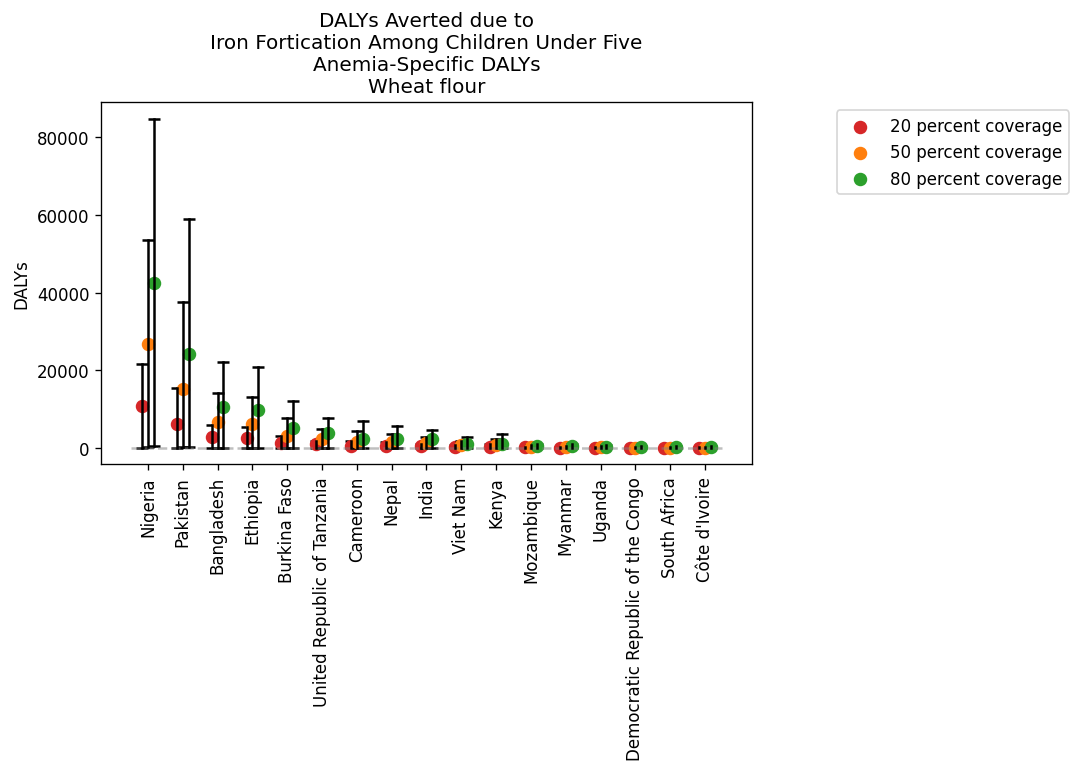

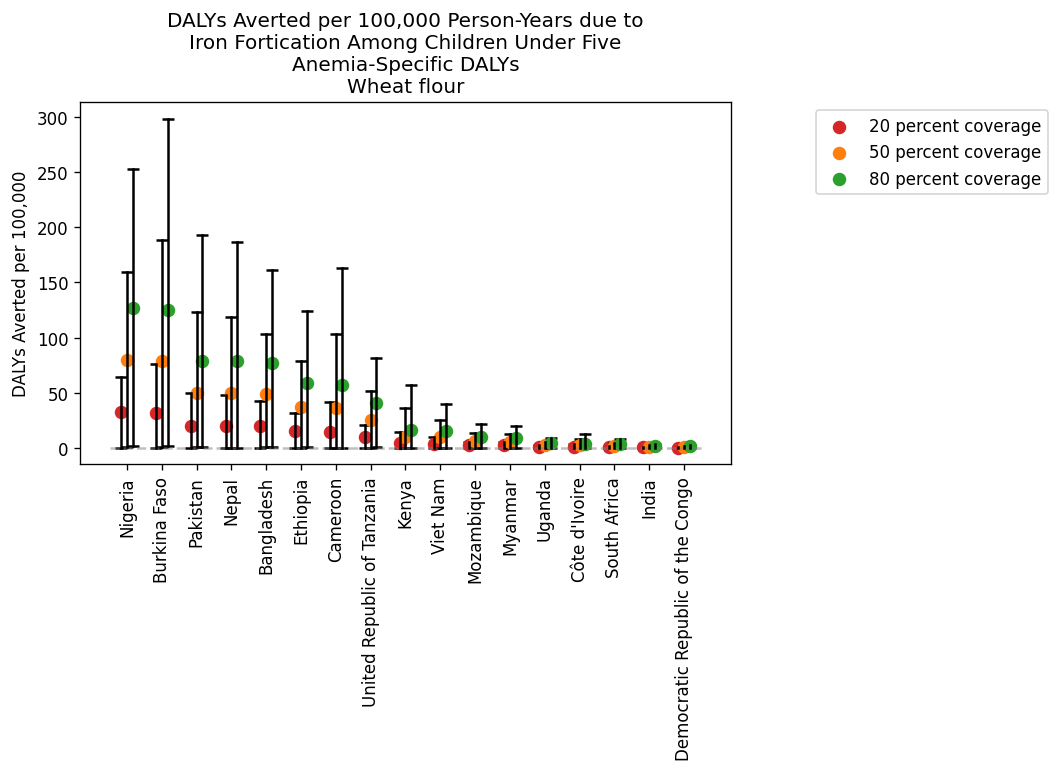

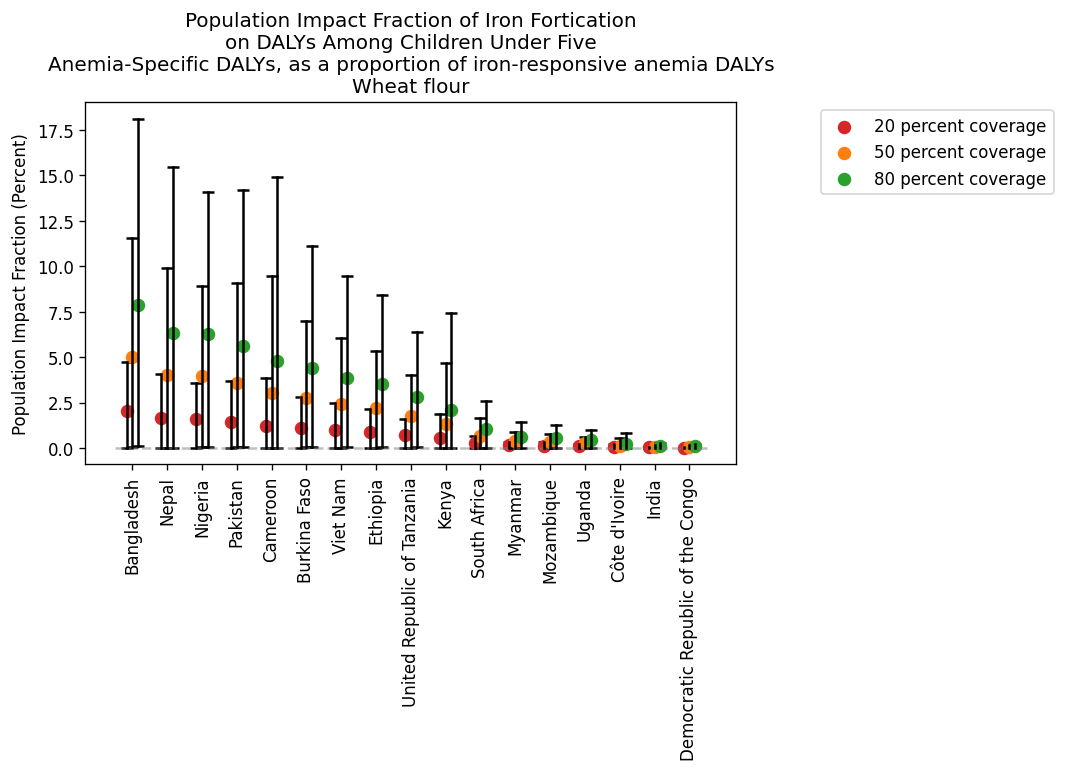

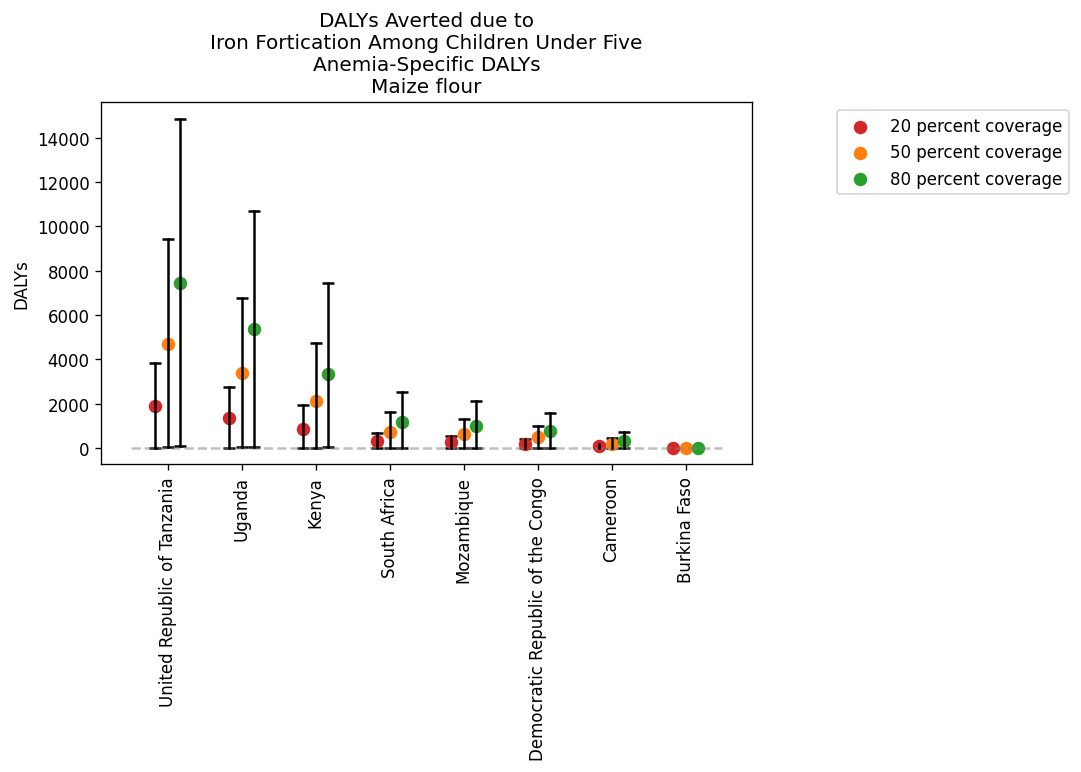

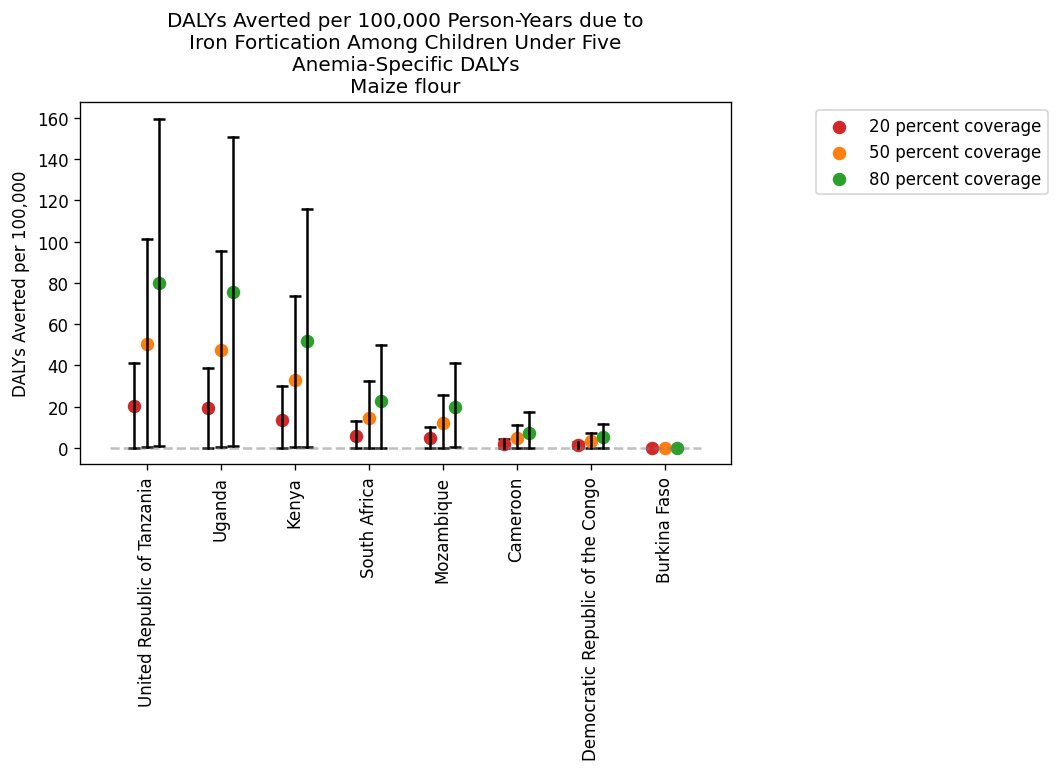

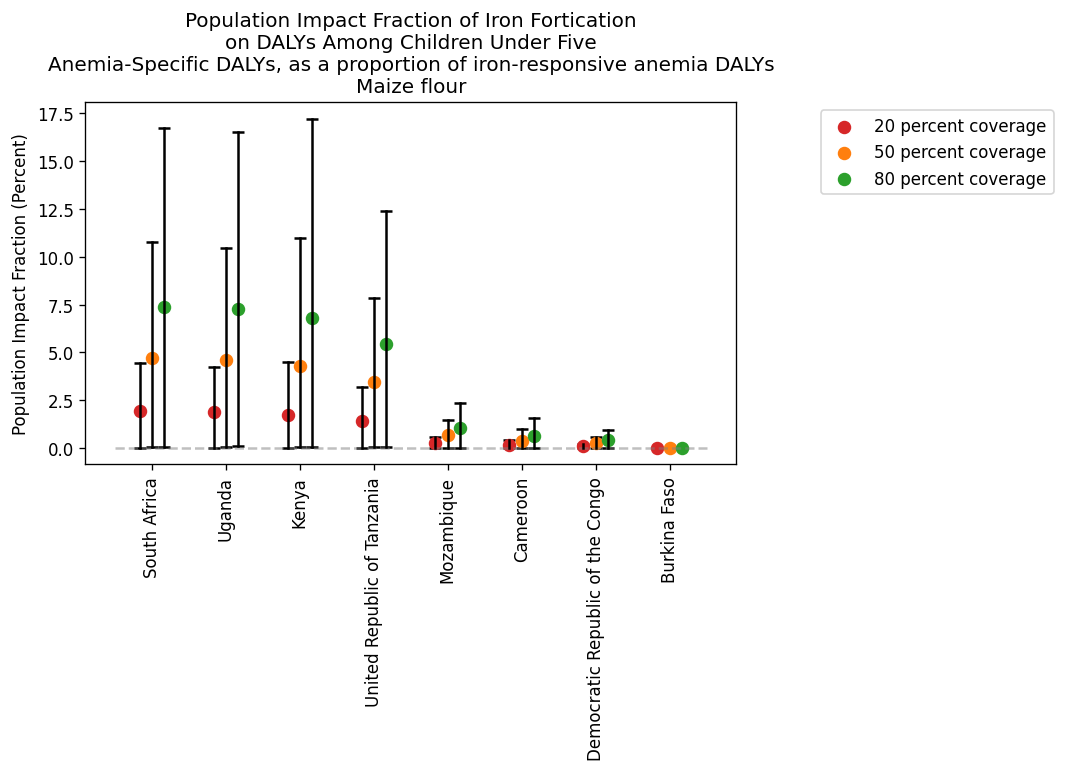

In [46]:
with PdfPages('results_plots/iron_anemia_u5.pdf') as pdf:
    for vehicle in vehicles:
        make_dot_plots(
            (anemia_counts_averted.reset_index()
             .loc[anemia_counts_averted.reset_index().vehicle==vehicle]
             .set_index(['location_id','coverage_level','year'])
             .drop(columns=['measure','vehicle'])), 
            'Iron', 
            'counts', 
            coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}',
            f'iron_u5_anemia_counts_averted_{vehicle}')
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
            (anemia_rates_averted.reset_index()
             .loc[anemia_rates_averted.reset_index().vehicle==vehicle]
             .set_index(['location_id','coverage_level','year'])
             .drop(columns=['measure','vehicle'])), 
            'Iron', 
            'rates', 
            coverage_levels, f'Anemia-Specific DALYs\n{vehicle.capitalize()}',
            f'iron_u5_anemia_rates_averted_{vehicle}')
        pdf.savefig(bbox_inches='tight')
        make_dot_plots(
            (anemia_pifs.reset_index()
             .loc[anemia_pifs.reset_index().vehicle==vehicle]
             .set_index(['location_id','coverage_level','year'])
             .drop(columns=['measure','vehicle'])), 
            'Iron', 
            'pifs', 
            coverage_levels, f'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs\n{vehicle.capitalize()}',
            f'iron_u5_anemia_pif_{vehicle}')
        pdf.savefig(bbox_inches='tight')